<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

<h1 align=center><font size = 5>Regression Models with Keras</font></h1>


# LAB 03

## Introduction


As we discussed in the videos, despite the popularity of more powerful libraries such as PyToch and TensorFlow, they are not easy to use and have a steep learning curve. So, for people who are just starting to learn deep learning, there is no better library to use other than the Keras library. 

Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. As you will see in this lab and the other labs in this course, building a very complex deep learning network can be achieved with Keras with only few lines of code. You will appreciate Keras even more, once you learn how to build deep models using PyTorch and TensorFlow in the other courses.

So, in this lab, you will learn how to use the Keras library to build a regression model.


<h2>Regression Models with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build a regression model.</h5>
<h5> 2. Download and Clean dataset </h5>
<h5> 3. Build a Neural Network </h5>
<h5> 4. Train and Test the Network. </h5>     



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>


<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore', FutureWarning)

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


Let's download the data and read it into a <em>pandas</em> dataframe.


In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 


#### Let's check how many data points we have.


In [3]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [6]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [9]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [10]:
n_cols = predictors_norm.shape[1] # number of predictors
n_cols

8

<a id="item1"></a>


<a id='item32'></a>


## Import Keras


Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.


#### Let's go ahead and import the Keras library


In [11]:
import keras

Using TensorFlow backend.


As you can see, the TensorFlow backend was used to install the Keras library.


Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.


In [12]:
from keras.models import Sequential
from keras.layers import Dense

<a id='item33'></a>


## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [13]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function create a model that has two hidden layers, each of 50 hidden units.


<a id="item4"></a>


<a id='item34'></a>


## Train and Test the Network


Let's call the function now to create our model.


In [14]:
# build the model
model = regression_model()

Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [15]:
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)



Train on 721 samples, validate on 309 samples
Epoch 1/100


2024-10-26 07:28:01.272782: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-10-26 07:28:01.280710: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394330000 Hz
2024-10-26 07:28:01.281300: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5642744339c0 executing computations on platform Host. Devices:
2024-10-26 07:28:01.281347: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-10-26 07:28:01.380731: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

 - 0s - loss: 1651.5555 - val_loss: 1143.4384
Epoch 2/100
 - 0s - loss: 1515.7915 - val_loss: 1015.2065
Epoch 3/100
 - 0s - loss: 1306.7085 - val_loss: 828.5755
Epoch 4/100
 - 0s - loss: 1001.2932 - val_loss: 599.7230
Epoch 5/100
 - 0s - loss: 643.7475 - val_loss: 381.4793
Epoch 6/100
 - 0s - loss: 374.2398 - val_loss: 249.8833
Epoch 7/100
 - 0s - loss: 259.6566 - val_loss: 206.8109
Epoch 8/100
 - 0s - loss: 231.8733 - val_loss: 189.1427
Epoch 9/100
 - 0s - loss: 213.9292 - val_loss: 180.8361
Epoch 10/100
 - 0s - loss: 202.6071 - val_loss: 175.0449
Epoch 11/100
 - 0s - loss: 193.0796 - val_loss: 170.7427
Epoch 12/100
 - 0s - loss: 185.5734 - val_loss: 165.8217
Epoch 13/100
 - 0s - loss: 179.5013 - val_loss: 166.1771
Epoch 14/100
 - 0s - loss: 174.3724 - val_loss: 165.8614
Epoch 15/100
 - 0s - loss: 170.3509 - val_loss: 161.4512
Epoch 16/100
 - 0s - loss: 165.9998 - val_loss: 162.5628
Epoch 17/100
 - 0s - loss: 162.3624 - val_loss: 161.5822
Epoch 18/100
 - 0s - loss: 160.0794 - val_loss

<strong>You can refer to this [link](https://keras.io/models/sequential/) to learn about other functions that you can use for prediction or evaluation.</strong>


Feel free to vary the following and note what impact each change has on the model's performance:

1. Increase or decreate number of neurons in hidden layers
2. Add more hidden layers
3. Increase number of epochs


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called *Introduction to Deep Learning & Neural Networks with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week3_LAB1).


<hr>

Copyright &copy; 2019 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).


# <b>Peer-graded Assignment: Build a Regression Model in Keras</b>

## A. Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error  as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the 
train_test_split
helper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
from sklearn.model_selection import train_test_split #import scikit-learn in order to randomly split the data into a training and test sets

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [18]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [19]:
# Splitting the data into a training and test sets by holding 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [20]:
# build the model
model = regression_model()

In [21]:
# fit the model
epochs = 50 #train the model for 50 epochs
model.fit(X_train, y_train, epochs=epochs, verbose=2)

Epoch 1/50
 - 0s - loss: 842.3669
Epoch 2/50
 - 0s - loss: 374.8185
Epoch 3/50
 - 0s - loss: 316.5862
Epoch 4/50
 - 0s - loss: 286.3623
Epoch 5/50
 - 0s - loss: 258.3334
Epoch 6/50
 - 0s - loss: 237.8454
Epoch 7/50
 - 0s - loss: 222.1769
Epoch 8/50
 - 0s - loss: 205.9553
Epoch 9/50
 - 0s - loss: 197.3940
Epoch 10/50
 - 0s - loss: 190.7618
Epoch 11/50
 - 0s - loss: 181.1222
Epoch 12/50
 - 0s - loss: 173.8582
Epoch 13/50
 - 0s - loss: 171.1186
Epoch 14/50
 - 0s - loss: 165.4447
Epoch 15/50
 - 0s - loss: 159.5375
Epoch 16/50
 - 0s - loss: 156.0658
Epoch 17/50
 - 0s - loss: 152.8736
Epoch 18/50
 - 0s - loss: 150.0819
Epoch 19/50
 - 0s - loss: 148.2024
Epoch 20/50
 - 0s - loss: 147.0979
Epoch 21/50
 - 0s - loss: 144.7750
Epoch 22/50
 - 0s - loss: 143.3839
Epoch 23/50
 - 0s - loss: 144.3408
Epoch 24/50
 - 0s - loss: 141.4089
Epoch 25/50
 - 0s - loss: 140.4428
Epoch 26/50
 - 0s - loss: 139.4580
Epoch 27/50
 - 0s - loss: 138.2275
Epoch 28/50
 - 0s - loss: 137.8261
Epoch 29/50
 - 0s - loss: 138

In [22]:
# evaluate the model on the test data
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

309/309 [==============================] - 0s 135us/step


125.42986902527053

In [23]:
from sklearn.metrics import mean_squared_error #  import the mean_squared_error function from Scikit-learn

In [24]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

125.42986932700694 0.0


In [25]:
# Create a list of 50 mean squared errors and report mean and the standard deviation of the mean squared errors.
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors_A = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors_A.append(mean_square_error)

mean_squared_errors_A = np.array(mean_squared_errors_A)
mean_A = np.mean(mean_squared_errors_A)
standard_deviation_A = np.std(mean_squared_errors_A)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_A))
print("Standard Deviation: "+str(standard_deviation_A))

MSE 1: 93.81765456955796
MSE 2: 120.84366876793526
MSE 3: 70.43377181858692
MSE 4: 67.95611392024266
MSE 5: 59.77221180937437
MSE 6: 61.25886352934112
MSE 7: 60.31048250661313
MSE 8: 48.685121715261715
MSE 9: 51.22316964158734
MSE 10: 56.41491531322689
MSE 11: 48.61575534660068
MSE 12: 45.71423892295862
MSE 13: 55.372431764324894
MSE 14: 55.982422912005084
MSE 15: 50.089460107500884
MSE 16: 44.73794136541175
MSE 17: 53.54830706698223
MSE 18: 48.766874763957894
MSE 19: 47.16657743484843
MSE 20: 47.77194326209405
MSE 21: 44.65852988036319
MSE 22: 46.71389827296186
MSE 23: 46.39951989874485
MSE 24: 47.24669841037985
MSE 25: 52.11912350207085
MSE 26: 50.84433378447992
MSE 27: 49.75451803361714
MSE 28: 45.223770623068205
MSE 29: 52.6043200323111
MSE 30: 53.710824367683685
MSE 31: 52.400101028985574
MSE 32: 44.89260991414388
MSE 33: 47.24699241366587
MSE 34: 49.910494313656706
MSE 35: 47.51625722743161
MSE 36: 54.9236761914102
MSE 37: 53.77386240665967
MSE 38: 53.39561329073119
MSE 39: 52.08

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

figsize = (10,8)
nbins   = 20
def plot_results(result_list,
                 label_list,
                 var_name = "sq(mse)",
                 figsize = (15,10),
                 nbins = 10):
    """
    plotting function
    
    parameters:
    -----------
      - result_list: list of np.arrays with the metrics of the niterations
      - label_list:  list of labels
    """
    
    if len(result_list) != len(label_list):
        raise ValueError("lenghts of result_list and label_list has to be the same")
        
    if len(result_list) == 0:
        raise ValueError("lenght of result_list has to be > 0")
        
    color_list = ["b","r","m","y"]
    
    xmin = +1.0e+20
    xmax = -1.0e+20
    for arr in result_list:
        min_tmp = np.amin(arr)
        max_tmp = np.amax(arr)
        
        if xmin > min_tmp:
            xmin = min_tmp
        if xmax < max_tmp:
            xmax = max_tmp
    
    percent   = 0.01
    delta     = xmax - xmin
    xmin     -= percent*delta
    xmax     += percent*delta
        
    bins = np.linspace(xmin, xmax, nbins+1)
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
    porcent = 0.05
    ymax = -1.0e+20
    for i,arr in enumerate(result_list): 
        n,_,_ = ax.hist(x       = arr,
                        bins    = bins,
                        color   = color_list[i],
                        alpha   = 0.5,
                        density = False,
                        label   = label_list[i]
                       )
        
        if ymax < np.amax(n):
            ymax = np.amax(n)
        
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.legend()
    ax.set_xlim([bins[0],bins[-1]])
    ax.set_ylim([0,ymax*(1.0 + porcent)])
    ax.set_xlabel(var_name)
    ax.set_ylabel('Occurences')
    ax.set_title(var_name + ' distribution')

    fig.tight_layout()

    plt.show()
          
    

In [27]:
# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean": [mean_A], "standard_deviation": [standard_deviation_A]})
df_results

,Part,mean,standard_deviation
0,A,54.21625,12.445317


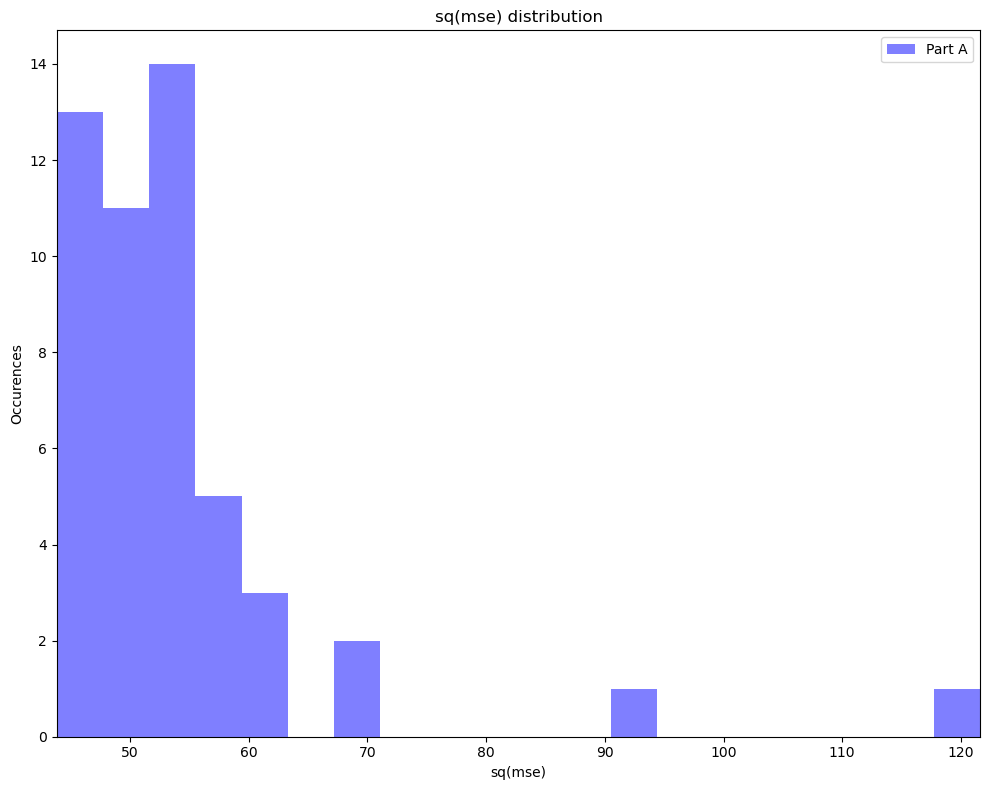

In [28]:
plot_results(result_list = [mean_squared_errors_A],
             label_list  = ["Part A"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

## B. Normalize the data (5 marks) 

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
from sklearn.model_selection import train_test_split #import scikit-learn in order to randomly split the data into a training and test sets

In [31]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [32]:
# Splitting the data into a training and test sets by holding 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=42)

In [33]:
# build the model
model = regression_model()

In [35]:
# fit the model
epochs = 50 #train the model for 50 epochs
model.fit(X_train, y_train, epochs=epochs, verbose=2)

Epoch 1/50
 - 0s - loss: 269.2501
Epoch 2/50
 - 0s - loss: 260.4309
Epoch 3/50
 - 0s - loss: 252.1385
Epoch 4/50
 - 0s - loss: 244.7077
Epoch 5/50
 - 0s - loss: 237.7207
Epoch 6/50
 - 0s - loss: 231.3495
Epoch 7/50
 - 0s - loss: 225.4190
Epoch 8/50
 - 0s - loss: 220.0361
Epoch 9/50
 - 0s - loss: 215.1617
Epoch 10/50
 - 0s - loss: 210.2613
Epoch 11/50
 - 0s - loss: 206.1606
Epoch 12/50
 - 0s - loss: 202.1802
Epoch 13/50
 - 0s - loss: 198.5471
Epoch 14/50
 - 0s - loss: 195.1778
Epoch 15/50
 - 0s - loss: 192.1288
Epoch 16/50
 - 0s - loss: 189.2987
Epoch 17/50
 - 0s - loss: 186.7795
Epoch 18/50
 - 0s - loss: 184.2113
Epoch 19/50
 - 0s - loss: 181.8852
Epoch 20/50
 - 0s - loss: 179.6267
Epoch 21/50
 - 0s - loss: 177.6495
Epoch 22/50
 - 0s - loss: 175.7615
Epoch 23/50
 - 0s - loss: 173.9598
Epoch 24/50
 - 0s - loss: 172.3335
Epoch 25/50
 - 0s - loss: 170.8783
Epoch 26/50
 - 0s - loss: 169.3135
Epoch 27/50
 - 0s - loss: 168.0051
Epoch 28/50
 - 0s - loss: 166.7333
Epoch 29/50
 - 0s - loss: 165

In [36]:
# evaluate the model on the test data
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

309/309 [==============================] - 0s 236us/step


150.06738947896125

In [37]:
from sklearn.metrics import mean_squared_error #  import the mean_squared_error function from Scikit-learn

In [38]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean_B = np.mean(mean_square_error)
standard_deviation_B = np.std(mean_square_error)
print(mean_B, standard_deviation_B)

150.06739577969697 0.0


In [39]:
# Create a list of 50 mean squared errors and report mean and the standard deviation of the mean squared errors.
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors_B = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors_B.append(mean_square_error)

mean_squared_errors_B = np.array(mean_squared_errors_B)
mean_B = np.mean(mean_squared_errors_B)
standard_deviation_B = np.std(mean_squared_errors_B)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_B))
print("Standard Deviation: "+str(standard_deviation_B))

MSE 1: 108.94489320427854
MSE 2: 112.39584906124374
MSE 3: 88.45627673004051
MSE 4: 81.92367330261033
MSE 5: 74.86397641376384
MSE 6: 72.409223636763
MSE 7: 69.08623939193183
MSE 8: 55.82683632366094
MSE 9: 50.00837290248439
MSE 10: 46.811765331280654
MSE 11: 45.59488807604151
MSE 12: 44.58344887298288
MSE 13: 51.00164768379483
MSE 14: 49.72453363659312
MSE 15: 44.666014291707754
MSE 16: 38.669563953930506
MSE 17: 42.90019236567723
MSE 18: 41.93467623516194
MSE 19: 40.57095259138681
MSE 20: 42.992779963224834
MSE 21: 39.863967944889005
MSE 22: 41.489376685380165
MSE 23: 38.26954785442661
MSE 24: 41.168733689391495
MSE 25: 44.01871421344843
MSE 26: 42.88156935312215
MSE 27: 40.886231777351654
MSE 28: 40.09341486217906
MSE 29: 46.50068034940553
MSE 30: 42.9690345714779
MSE 31: 42.1976177869877
MSE 32: 38.22978030825124
MSE 33: 37.879781630432724
MSE 34: 43.86843674545535
MSE 35: 41.34221775091967
MSE 36: 47.14048284388669
MSE 37: 42.652795689777264
MSE 38: 45.534140651665844
MSE 39: 42.7

In [40]:
df_results.loc[df_results.shape[0]] = ["B",mean_B,standard_deviation_B]
df_results

,Part,mean,standard_deviation
0,A,54.216250,12.445317
1,B,49.683885,16.554922


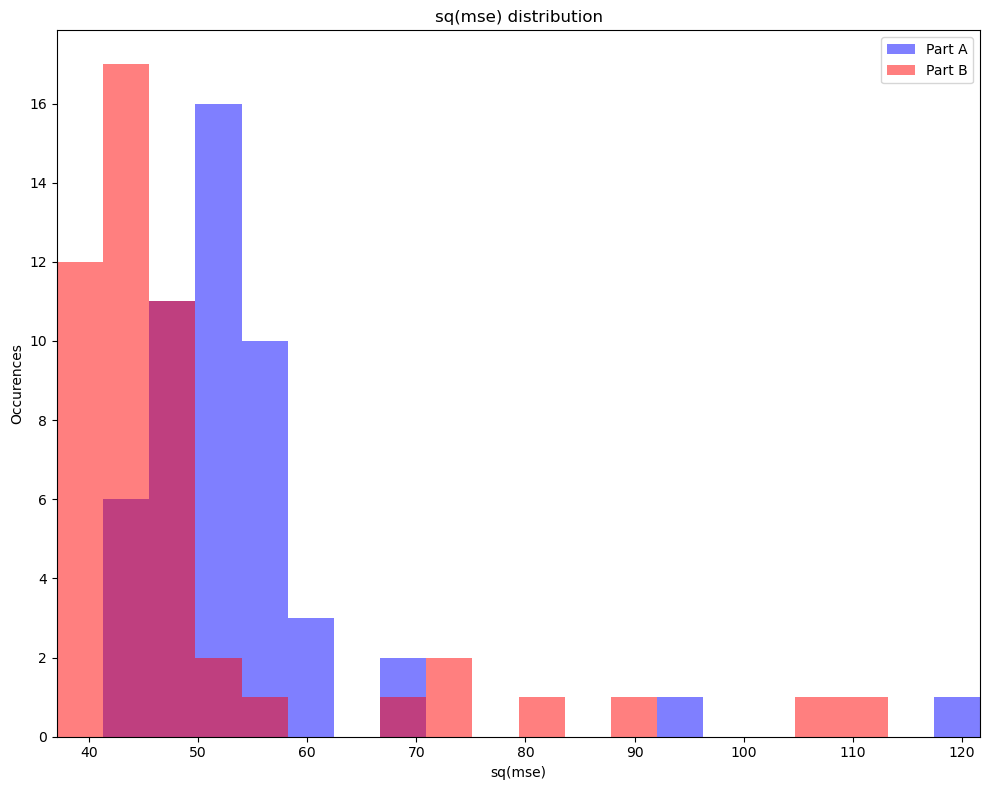

In [41]:
plot_results(result_list = [mean_squared_errors_A,mean_squared_errors_B],
             label_list  = ["Part A","Part B"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

How does the mean of the mean squared errors compare to that from Step A?

Part B has a slightly lower mean for sq(mse) compared to Part A, as its distribution leans more towards the lower end of the sq(mse) range.

## C. Increate the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [43]:
from sklearn.model_selection import train_test_split #import scikit-learn in order to randomly split the data into a training and test sets

In [44]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [45]:
# Splitting the data into a training and test sets by holding 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=42)

In [46]:
# build the model
model = regression_model()

In [47]:
# fit the model
epochs = 50 #train the model for 50 epochs
model.fit(X_train, y_train, epochs=epochs, verbose=2)

Epoch 1/50
 - 0s - loss: 1561.3360
Epoch 2/50
 - 0s - loss: 1544.1758
Epoch 3/50
 - 0s - loss: 1526.7835
Epoch 4/50
 - 0s - loss: 1509.1427
Epoch 5/50
 - 0s - loss: 1490.8129
Epoch 6/50
 - 0s - loss: 1471.7781
Epoch 7/50
 - 0s - loss: 1451.9067
Epoch 8/50
 - 0s - loss: 1431.2892
Epoch 9/50
 - 0s - loss: 1409.4174
Epoch 10/50
 - 0s - loss: 1387.0959
Epoch 11/50
 - 0s - loss: 1363.3255
Epoch 12/50
 - 0s - loss: 1338.9676
Epoch 13/50
 - 0s - loss: 1313.3729
Epoch 14/50
 - 0s - loss: 1287.3210
Epoch 15/50
 - 0s - loss: 1259.9616
Epoch 16/50
 - 0s - loss: 1232.1539
Epoch 17/50
 - 0s - loss: 1203.4262
Epoch 18/50
 - 0s - loss: 1174.7943
Epoch 19/50
 - 0s - loss: 1144.9895
Epoch 20/50
 - 0s - loss: 1115.0622
Epoch 21/50
 - 0s - loss: 1085.0167
Epoch 22/50
 - 0s - loss: 1054.8586
Epoch 23/50
 - 0s - loss: 1024.5914
Epoch 24/50
 - 0s - loss: 993.8250
Epoch 25/50
 - 0s - loss: 964.1220
Epoch 26/50
 - 0s - loss: 933.7505
Epoch 27/50
 - 0s - loss: 904.0364
Epoch 28/50
 - 0s - loss: 874.9200
Epoch 

In [48]:
# evaluate the model on the test data
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

309/309 [==============================] - 0s 256us/step


425.9717958320692

In [49]:
from sklearn.metrics import mean_squared_error #  import the mean_squared_error function from Scikit-learn

In [50]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean_C = np.mean(mean_square_error)
standard_deviation_C = np.std(mean_square_error)
print(mean_C, standard_deviation_C)

425.97179795660605 0.0


In [52]:
# Create a list of 50 mean squared errors and report mean and the standard deviation of the mean squared errors.
total_mean_squared_errors = 50
epochs = 100
mean_squared_errors_C = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors_C.append(mean_square_error)

mean_squared_errors_C = np.array(mean_squared_errors_C)
mean_C = np.mean(mean_squared_errors_C)
standard_deviation_C = np.std(mean_squared_errors_C)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_C))
print("Standard Deviation: "+str(standard_deviation_C))

MSE 1: 56.75681690104957
MSE 2: 51.4051285530757
MSE 3: 35.27626324008584
MSE 4: 37.53675150948435
MSE 5: 38.72874806228193
MSE 6: 38.61911373693966
MSE 7: 38.97715386449326
MSE 8: 32.04830810398732
MSE 9: 31.921118813425206
MSE 10: 33.221398585051006
MSE 11: 33.076307932535805
MSE 12: 28.11899183946134
MSE 13: 32.22701535332936
MSE 14: 36.08987830449077
MSE 15: 28.32978955364536
MSE 16: 24.20247684404688
MSE 17: 29.521142255912707
MSE 18: 29.908547435377795
MSE 19: 25.38152094720637
MSE 20: 33.065513931817605
MSE 21: 28.389761063659076
MSE 22: 25.859765845980846
MSE 23: 24.972574913000212
MSE 24: 28.3811043797959
MSE 25: 27.722231485311266
MSE 26: 30.760720188177906
MSE 27: 24.232687249538582
MSE 28: 25.664356990925317
MSE 29: 32.72720772703103
MSE 30: 29.721957950530314
MSE 31: 26.69328710562203
MSE 32: 22.135528311374504
MSE 33: 22.98797222248559
MSE 34: 27.543395551663
MSE 35: 26.87338454360715
MSE 36: 31.232751352501534
MSE 37: 23.022489396499584
MSE 38: 27.37027924423465
MSE 39: 

In [53]:
df_results.loc[df_results.shape[0]] = ["C",mean_C,standard_deviation_C]
df_results

,Part,mean,standard_deviation
0,A,54.216250,12.445317
1,B,49.683885,16.554922
2,C,30.172986,6.473474


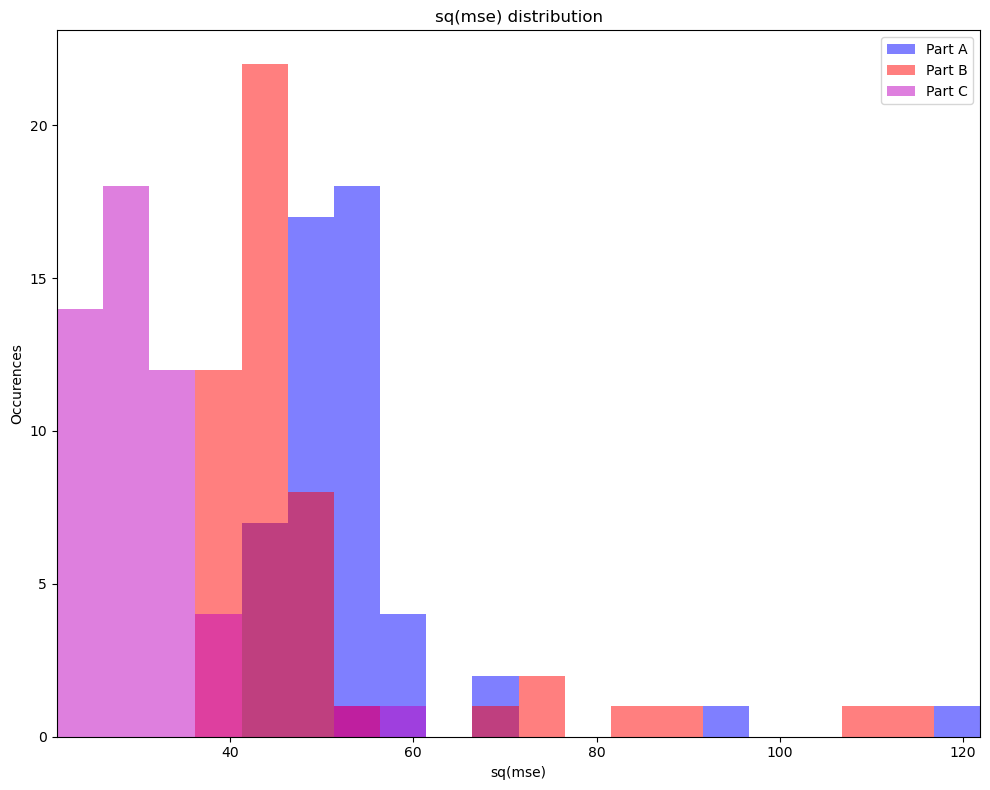

In [54]:
plot_results(result_list = [mean_squared_errors_A,mean_squared_errors_B,mean_squared_errors_C],
             label_list  = ["Part A","Part B","Part C"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

How does the mean of the mean squared errors compare to that from Step B?

By increasing the number of epocs we obtain more precise (lower mse mean) and stable (lower standard deviation) results ( as few as possible)

## D. Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [56]:
from sklearn.model_selection import train_test_split #import scikit-learn in order to randomly split the data into a training and test sets

In [57]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [58]:
# Splitting the data into a training and test sets by holding 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=42)

In [59]:
# build the model
model = regression_model()

In [60]:
# fit the model
epochs = 50 #train the model for 50 epochs
model.fit(X_train, y_train, epochs=epochs, verbose=2)

Epoch 1/50
 - 0s - loss: 1596.7329
Epoch 2/50
 - 0s - loss: 1581.3275
Epoch 3/50
 - 0s - loss: 1560.5445
Epoch 4/50
 - 0s - loss: 1528.7584
Epoch 5/50
 - 0s - loss: 1477.3866
Epoch 6/50
 - 0s - loss: 1398.3913
Epoch 7/50
 - 0s - loss: 1279.2541
Epoch 8/50
 - 0s - loss: 1113.9732
Epoch 9/50
 - 0s - loss: 902.2910
Epoch 10/50
 - 0s - loss: 664.2825
Epoch 11/50
 - 0s - loss: 454.6556
Epoch 12/50
 - 0s - loss: 316.6335
Epoch 13/50
 - 0s - loss: 251.6535
Epoch 14/50
 - 0s - loss: 225.9497
Epoch 15/50
 - 0s - loss: 212.0857
Epoch 16/50
 - 0s - loss: 201.3350
Epoch 17/50
 - 0s - loss: 194.0336
Epoch 18/50
 - 0s - loss: 189.2318
Epoch 19/50
 - 0s - loss: 185.5092
Epoch 20/50
 - 0s - loss: 181.8641
Epoch 21/50
 - 0s - loss: 178.4758
Epoch 22/50
 - 0s - loss: 175.4060
Epoch 23/50
 - 0s - loss: 172.3317
Epoch 24/50
 - 0s - loss: 169.6096
Epoch 25/50
 - 0s - loss: 167.3782
Epoch 26/50
 - 0s - loss: 164.6274
Epoch 27/50
 - 0s - loss: 162.4918
Epoch 28/50
 - 0s - loss: 160.5439
Epoch 29/50
 - 0s - l

In [61]:
# evaluate the model on the test data
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

309/309 [==============================] - 0s 232us/step


131.38249404067747

In [62]:
from sklearn.metrics import mean_squared_error #  import the mean_squared_error function from Scikit-learn

In [63]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean_D = np.mean(mean_square_error)
standard_deviation_D = np.std(mean_square_error)
print(mean_D, standard_deviation_D)

131.38248868702553 0.0


In [64]:
# Create a list of 50 mean squared errors and report mean and the standard deviation of the mean squared errors.
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors_D = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors_D.append(mean_square_error)

mean_squared_errors_D = np.array(mean_squared_errors_D)
mean_D = np.mean(mean_squared_errors_D)
standard_deviation_D = np.std(mean_squared_errors_D)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean_D))
print("Standard Deviation: "+str(standard_deviation_D))

MSE 1: 66.90759348946482
MSE 2: 59.58790335300285
MSE 3: 45.36045348528519
MSE 4: 46.66577979276095
MSE 5: 45.020700559646954
MSE 6: 46.18366611814036
MSE 7: 47.31815693679365
MSE 8: 33.00041381440888
MSE 9: 33.62623752976698
MSE 10: 35.0147669770571
MSE 11: 36.57569184040946
MSE 12: 27.559183126900187
MSE 13: 42.085934759343715
MSE 14: 40.16436661408557
MSE 15: 34.765776865690654
MSE 16: 26.951788578218626
MSE 17: 36.17429165392632
MSE 18: 33.15623500663486
MSE 19: 29.971533920386847
MSE 20: 35.24167983663121
MSE 21: 29.413418803785998
MSE 22: 34.790646920312184
MSE 23: 27.356722760740606
MSE 24: 33.42875530650315
MSE 25: 34.32684223705897
MSE 26: 36.15665944417318
MSE 27: 26.974357642016365
MSE 28: 27.725619343877995
MSE 29: 34.829365566710436
MSE 30: 29.99877911786817
MSE 31: 28.90556736671423
MSE 32: 27.652663635204526
MSE 33: 25.903125059257434
MSE 34: 31.79596573172264
MSE 35: 32.80706021700862
MSE 36: 33.8659211069249
MSE 37: 25.615089052317597
MSE 38: 29.26271965742883
MSE 39: 

In [65]:
df_results.loc[df_results.shape[0]] = ["D",mean_D,standard_deviation_D]
df_results

,Part,mean,standard_deviation
0,A,54.216250,12.445317
1,B,49.683885,16.554922
2,C,30.172986,6.473474
3,D,34.019027,8.302585


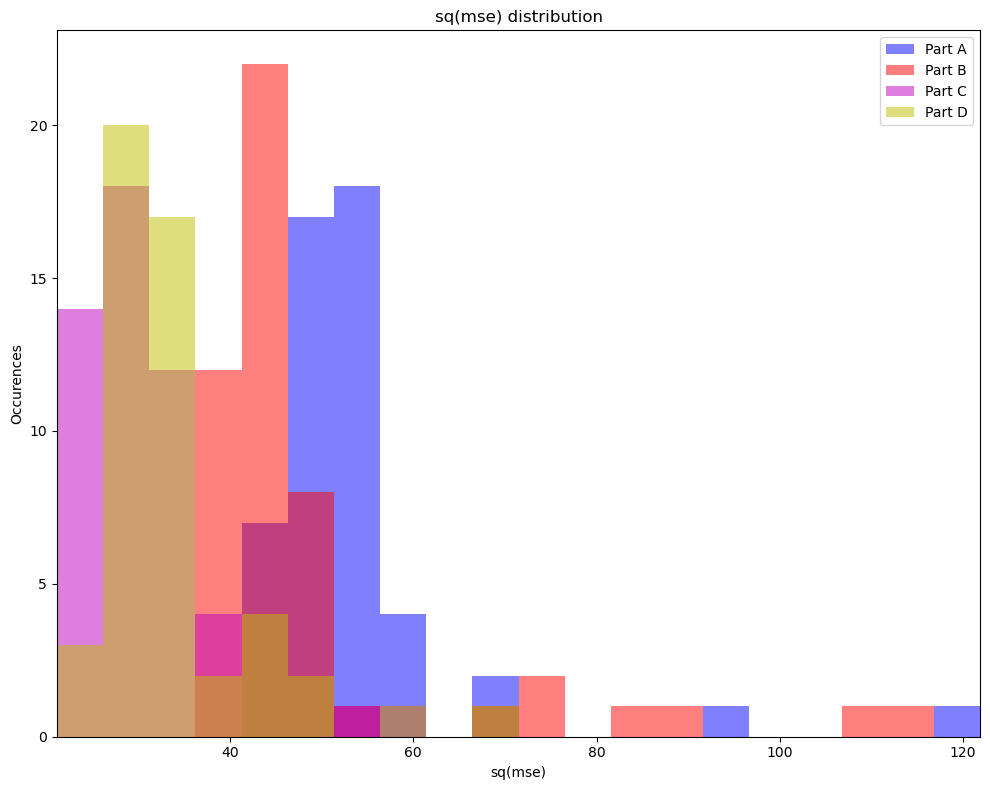

In [66]:
plot_results(result_list = [mean_squared_errors_A,mean_squared_errors_B,mean_squared_errors_C,mean_squared_errors_D],
             label_list  = ["Part A","Part B","Part C","Part D"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

How does the mean of the mean squared errors compare to that from Step B?

By increasing the model complexity (more hidden layers) improves the results, both in terms of precision (mse mean) and stability (mse standard deviation).